In [ ]:
from fastai.vision.all import *
# %matplotlib inline

In [ ]:
path = 'path-to-image-folder'
model_name = 'RC_bin_clas'

In [ ]:
batch_size = 10
img_size = 200

In [ ]:
# extra_tfms = [Hue(max_hue=0.01, p=1, draw=None, batch=False) ]
extra_tfms = []

In [ ]:
# setup trasnforms
item_tfms = [Resize(img_size)]
batch_tfms = [Normalize.from_stats(*imagenet_stats),
            *aug_transforms(size=img_size, flip_vert=True,max_rotate=90.0,max_lighting=0.1,
                            max_warp=0, max_zoom=1.05, min_zoom=0.95,
                           xtra_tfms=extra_tfms)]

In [ ]:
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2,splitter=RandomSplitter(seed=42),
                                    bs=batch_size,
                                    item_tfms=item_tfms,
                                    batch_tfms=batch_tfms
                                   )

In [ ]:
data.vocab

['RC', 'no RC']

In [ ]:
type(data.dataset[0][1])

fastai.torch_core.TensorCategory

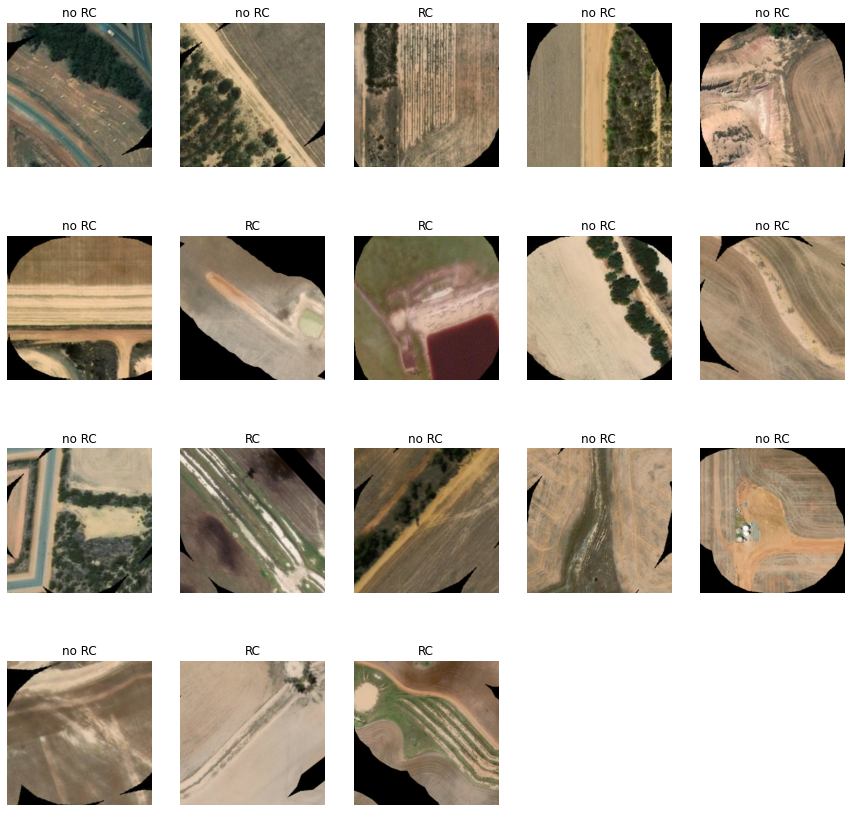

In [ ]:
# show some data
data.show_batch(max_n = 18, figsize = (15,15))

In [ ]:
np.savetxt(path+"/classes.csv", np.array(data.vocab), fmt='%s')
data.vocab

['RC', 'no RC']

In [ ]:
learn = vision_learner(data, resnet18, metrics=error_rate).to_fp16()

In [ ]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [ ]:
# learn.fine_tune?

epoch,train_loss,valid_loss,error_rate,time
0,0.218792,0.191371,0.072093,00:07
1,0.241326,0.265815,0.113953,00:07


Better model found at epoch 0 with error_rate value: 0.07209301739931107.


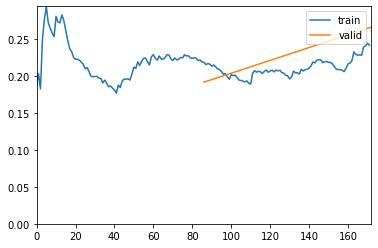

epoch,train_loss,valid_loss,error_rate,time
0,0.211325,0.219121,0.100000,00:09
1,0.202136,0.205622,0.086047,00:09
2,0.191261,0.183854,0.074419,00:09
3,0.179155,0.199863,0.067442,00:09
4,0.204510,0.264437,0.090698,00:09
5,0.216195,0.226093,0.088372,00:08
6,0.200709,0.221323,0.076744,00:08
7,0.214884,0.205914,0.079070,00:08
8,0.188578,0.236834,0.083721,00:08
9,0.186806,0.244285,0.081395,00:09


Better model found at epoch 0 with error_rate value: 0.09999999403953552.


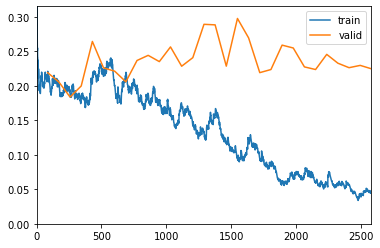

Better model found at epoch 1 with error_rate value: 0.086046501994133.
Better model found at epoch 2 with error_rate value: 0.07441859692335129.
Better model found at epoch 3 with error_rate value: 0.06744185090065002.


In [ ]:
learn.fine_tune(30,freeze_epochs=2,cbs = [ShowGraphCallback(),
                         SaveModelCallback(monitor='error_rate',with_opt=True, fname=model_name)])

In [ ]:
# reload the best model
learn.load(model_name)
learn = learn.to_fp32()
learn.export('models/'+model_name+'.pkl')

In [ ]:
interp = Interpretation.from_learner(learn)

In [ ]:
interp = Interpretation.from_learner(learn)
loss = interp.losses.mean()

In [ ]:
'models/'+model_name+'.pkl'

'models/RC_bin_clas.pkl'

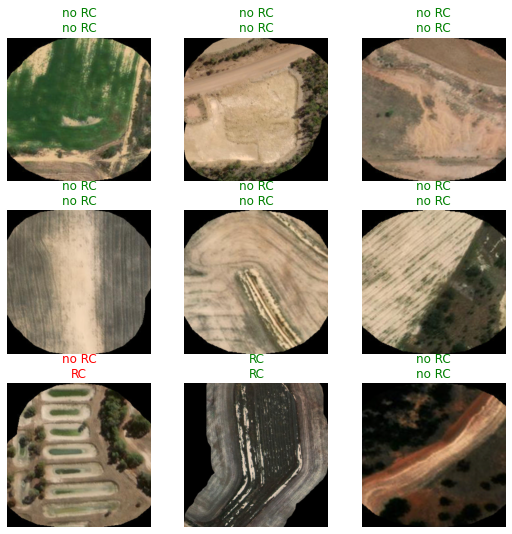

In [ ]:
learn.show_results()

In [ ]:
interp.plot_top_losses?

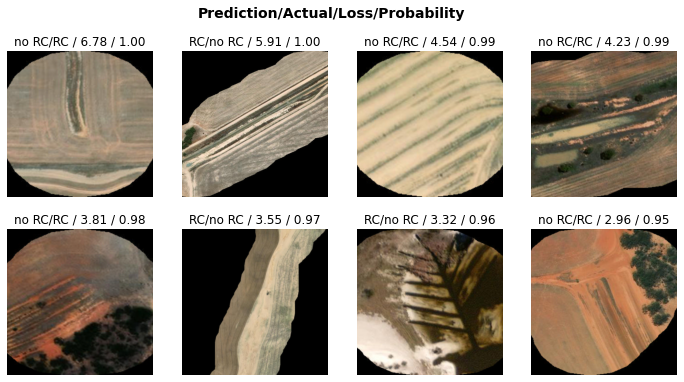

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(8)

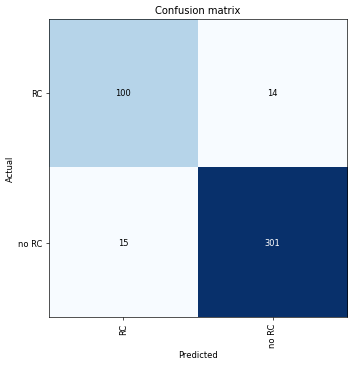

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)